In [2]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039164 sha256=d41426efec34c8e1198ef5a4400196955a64ce4408088c291b8b66922e6c3493
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan, DBSCAN
import hdbscan
from sklearn.preprocessing import normalize, StandardScaler


import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [22]:
X = pd.read_csv('Mall_Customers.csv')
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


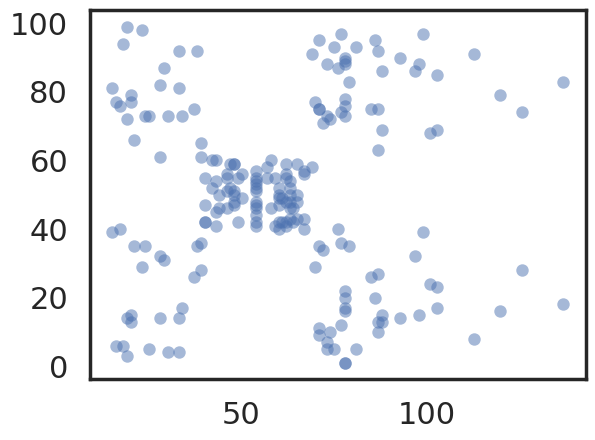

In [23]:
X = X.iloc[:,[3,4]].values
plt.scatter(X[:,0], X[:,1], color='b', **plot_kwds)

In [24]:
cluster = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
cluster.fit(X)


HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

<Axes: >

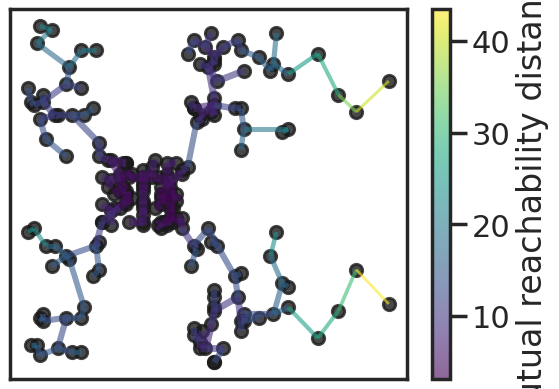

In [25]:
cluster.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

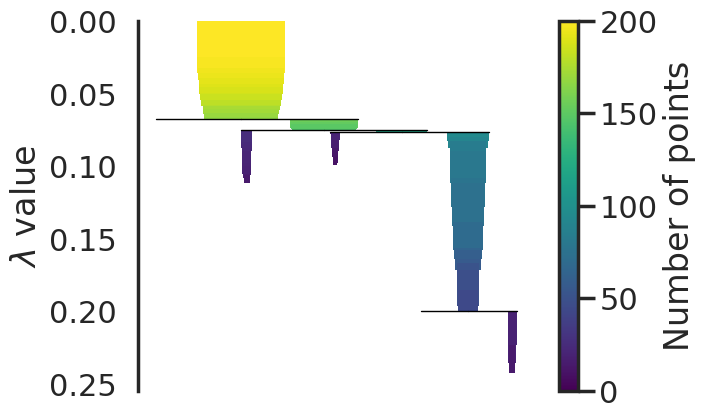

In [26]:
cluster.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

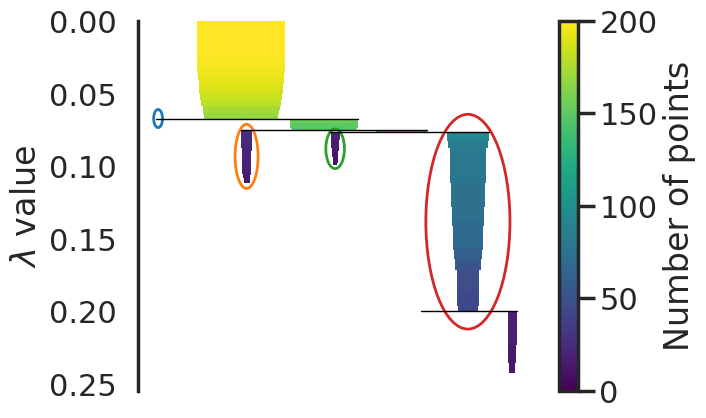

In [27]:
cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

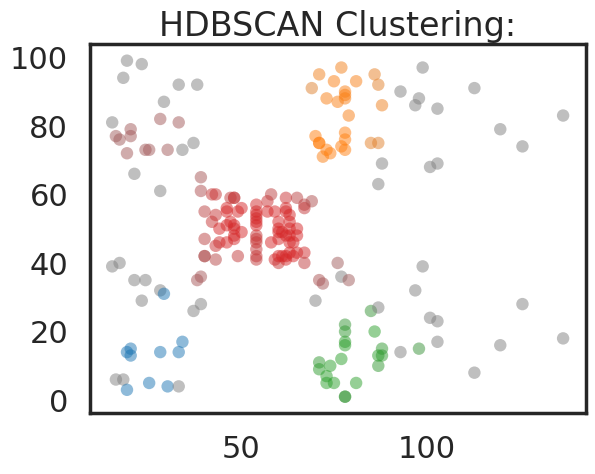

In [29]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(cluster.labels_, cluster.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering:")
plt.show()